In [1]:
import os
import shutil
from matplotlib import pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import train_match_config

# from criterions.loss import CriterionCE, CriterionMatching
from criterions.loss_match1 import CriterionCE, CriterionMatching
import torchvision.transforms.functional as F

from datasets import get_dataset
from models import get_model, ERFNet_Semantic_Original
from utils.utils import AverageMeter, Logger, Visualizer  # for CVPPP


torch.backends.cudnn.benchmark = True

args = train_match_config.get_args()

# set device
device = torch.device("cuda:0" if args['cuda'] else "cpu")

# train dataloader (student)
train_dataset = get_dataset(
    args['train_dataset']['name'], args['train_dataset']['kwargs'])
train_dataset_it = torch.utils.data.DataLoader(
    train_dataset, batch_size=args['train_dataset']['batch_size'], shuffle=False, drop_last=True,
    num_workers=args['train_dataset']['workers'], pin_memory=True if args['cuda'] else False)

# val dataloader (student)
val_dataset = get_dataset(
    args['val_dataset']['name'], args['val_dataset']['kwargs'])
val_dataset_it = torch.utils.data.DataLoader(
    val_dataset, batch_size=args['val_dataset']['batch_size'], shuffle=False, drop_last=True,
    num_workers=args['train_dataset']['workers'], pin_memory=True if args['cuda'] else False)

# image files:  81
# label(bg/plant/disease) files:  81
# image(crop) files:  81
# label(crop) files:  81
Corn Dataset(Teacher) created [train]
# image files:  10
# label(bg/plant/disease) files:  10
Corn Dataset(Teacher) created [val]


In [2]:
# set model (student)
# model = get_model(args['model']['name'], args['model']['kwargs'])
# model = torch.nn.DataParallel(model).to(device)
# state = torch.load('D:/SegMemoryV2/save/teacher/erfnet_original/weight/best_recon2_iou_model_555.pth')
# model.load_state_dict(state['model_state_dict'], strict=False)
# model.train()

Creating Branched ERFNet_Semantic_Embedding3 with 3 classes


DataParallel(
  (module): ERFNet_Semantic3(
    (encoder): Encoder(
      (initial_block): DownsamplerBlock(
        (conv): Conv2d(3, 13, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (layers1): ModuleList(
        (0): DownsamplerBlock(
          (conv): Conv2d(16, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): non_bottleneck_1d(
          (conv3x1_1): Conv2d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
          (conv1x3_1): Conv2d(64, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
          (bn1): BatchNorm2d(64, eps=0.001, momentum=0.1, affine

In [4]:
# Training (Student)
for i, sample in enumerate(tqdm(train_dataset_it)):
    image = sample['image']  # (N, 3, 512, 512)
    label = sample['label_all'].squeeze(1)  # (N, 512, 512)
    
    if i==0:
        break

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]


In [8]:
size = (1024, 1024)

image_hr = nn.functional.interpolate(image.float(),
                                     size=size, mode='nearest').squeeze(1)  # (N, h, w)

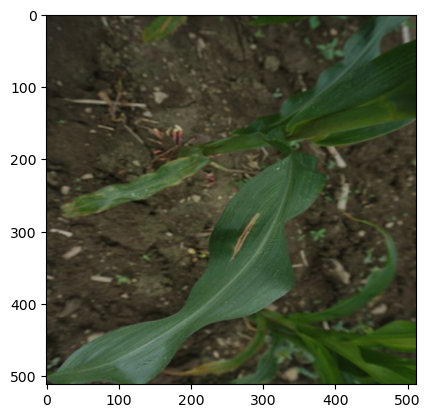

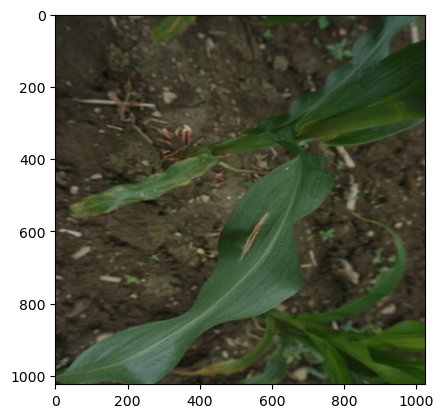

In [12]:
b = 0

plt.imshow(image[b].permute(1,2,0))
plt.show()
plt.imshow(image_hr[b].permute(1,2,0))
plt.show()

In [16]:
h_min = 230
h_max = 380
w_min = 220
w_max = 320

image_crop = image[:, :, h_min:h_max, w_min:w_max]
image_hr_crop = image_hr[:, :, 2*h_min:2*h_max, 2*w_min:2*w_max]

image_crop = nn.functional.interpolate(image_crop.float(), size=(512, 512), mode='nearest')
image_hr_crop = nn.functional.interpolate(image_hr_crop.float(), size=(512, 512), mode='nearest')

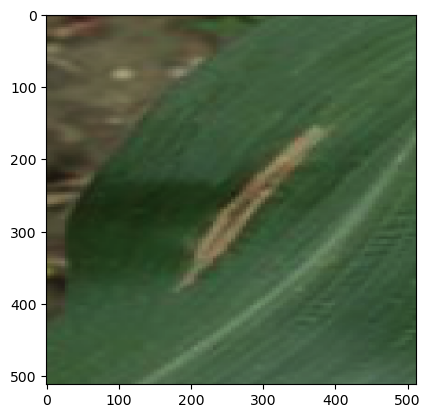

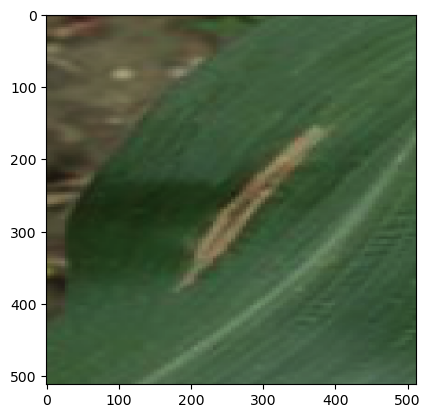

In [17]:
b = 0

plt.imshow(image_crop[b].permute(1,2,0))
plt.show()
plt.imshow(image_hr_crop[b].permute(1,2,0))
plt.show()